# Decision Mining

### Import Modules

In [1]:
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
from py_script.import_log import get_Event_Log
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

warnings.filterwarnings('ignore')


### Import Log

In [2]:
log = get_Event_Log('../data/log.csv')
log


,case:concept:name,concept:name,time:timestamp,Device
0,1,Instanz gestartet,2023-05-15 09:38:00+00:00,Workstation
1,1,Ticket öffnen,2023-05-15 10:00:00+00:00,Workstation
2,1,Incident registrieren,2023-05-15 10:15:00+00:00,Workstation
3,1,Incident klassifizieren,2023-05-15 10:32:00+00:00,Workstation
4,1,Incident beheben,2023-05-15 12:30:00+00:00,Workstation
...,...,...,...,...
106,9,Incident registrieren,2023-05-15 10:15:00+00:00,Workstation
107,9,Incident klassifizieren,2023-05-15 10:32:00+00:00,Workstation
108,9,Incident beheben,2023-05-15 12:30:00+00:00,Workstation
109,9,Reporting über Incident abschließen,2023-05-15 12:58:00+00:00,Workstation


### Transform Dataframe

In [3]:
decision_activity_name = 'Incident klassifizieren'
resulting_activity_names = ['Problem beheben', 'Incident beheben']
decision_events = log[log['concept:name'] == decision_activity_name]
decision_table = decision_events.copy()[0:0]

for i in decision_events.index:
    sucessor_event = log.loc[[i+1]]
    event_name = sucessor_event['concept:name'].values[0]
    if event_name in resulting_activity_names:
        decision_table = pd.concat([decision_table, sucessor_event], ignore_index=True)

decision_table= decision_table[['Device', 'concept:name']]
decision_table


,Device,concept:name
0,Workstation,Incident beheben
1,iPad,Problem beheben
2,iPad,Problem beheben
3,iPhone,Problem beheben
4,iPhone,Problem beheben
5,iPhone,Problem beheben
6,iPad,Problem beheben
7,Workstation,Incident beheben
8,Workstation,Incident beheben
9,Workstation,Incident beheben


In [4]:
decision_table['Device'] = decision_table['Device'].astype('category')
decision_table['Device_category'] = decision_table['Device'].cat.codes
decision_table= decision_table[['Device','Device_category', 'concept:name']]
decision_table


,Device,Device_category,concept:name
0,Workstation,0,Incident beheben
1,iPad,1,Problem beheben
2,iPad,1,Problem beheben
3,iPhone,2,Problem beheben
4,iPhone,2,Problem beheben
5,iPhone,2,Problem beheben
6,iPad,1,Problem beheben
7,Workstation,0,Incident beheben
8,Workstation,0,Incident beheben
9,Workstation,0,Incident beheben


### Train Model

In [5]:
X = decision_table[['Device_category']]
y = decision_table[['concept:name']]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

### Plot Tree

In [6]:
categories = decision_table[['Device', 'Device_category']].drop_duplicates(subset='Device')
categories

,Device,Device_category
0,Workstation,0
1,iPad,1
3,iPhone,2


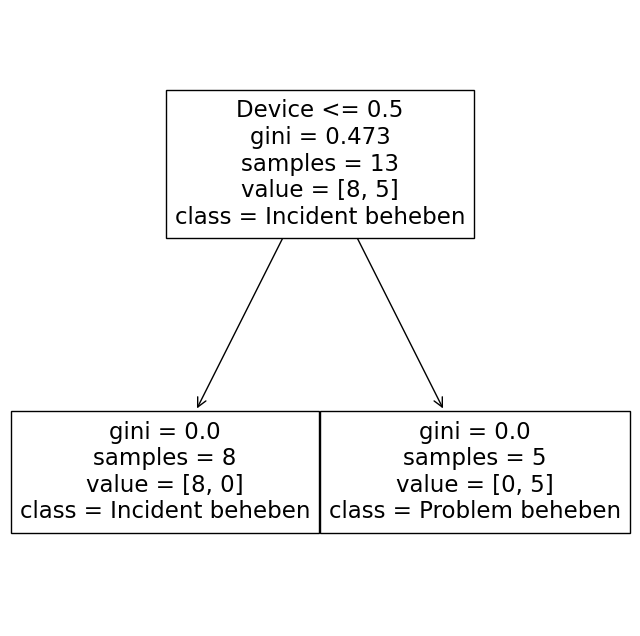

In [7]:
labels = list(y['concept:name'].unique())
plt.figure(figsize=(8,8))
tree.plot_tree(clf, feature_names=['Device'], class_names=labels)
plt.show()